## Import Libraries

In [57]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

## Load CIFAR-10 dataset

In [72]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

### Normalize pixel values to be between 0 and 1

#### This preprocessing technique is applied to ensure that input features have similar magnitudes, aiding faster convergence of optimization algorithms and preventing issues like gradient explosion or vanishing during training

In [74]:
train_images, test_images = train_images / 255.0, test_images / 255.0

#### We perform one-hot encoding on the labels to convert categorical labels into a format that is suitable for training a neural network model.

In [75]:
# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

## Plotting some images from the train dataset by their labels

In [77]:
import matplotlib.pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


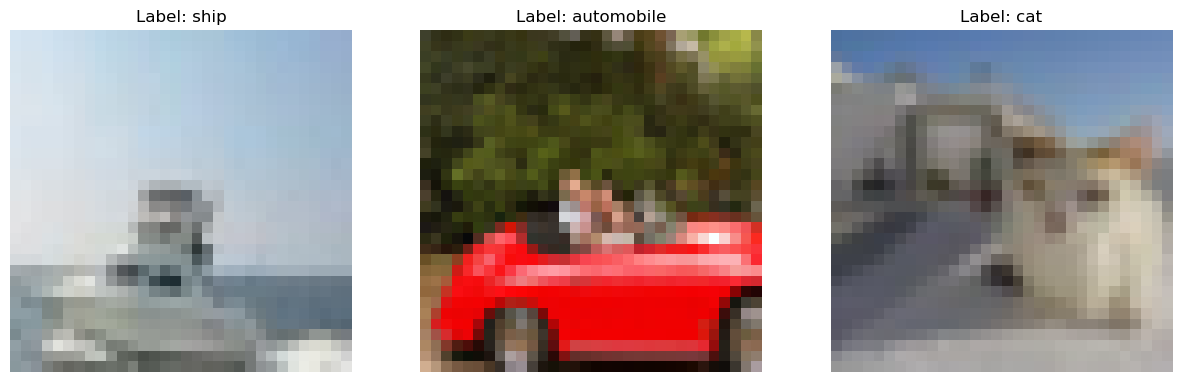

In [86]:
import matplotlib.pyplot as plt

num_rows = 1
num_cols = 3
index=[100 , 99 , 80]
# Set the figure size
plt.figure(figsize=(15, 5))

for i, idx in enumerate(index):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(train_images[idx], interpolation='nearest')
    plt.title('Label: ' + class_names[train_labels[idx].argmax()])
    plt.axis('off')

plt.show()


## Data augmentation

#### Data augmentation is a technique used to artificially increase the size of a training dataset by applying various transformations to the existing images. The purpose of data augmentation is to introduce variability into the training data, which helps improve the model's generalization and robustness.

In [79]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(train_images)

# Define the CNN architecture with dropout and batch normalization layers


### The defined convolutional neural network (CNN) architecture incorporates convolutional layers for feature extraction, batch normalization to stabilize training by normalizing layer activations, and dropout layers to prevent overfitting by randomly deactivating neurons. Max-pooling layers are utilized for downsampling, reducing computational complexity. Dense layers at the end of the network perform classification, producing probabilities for the input images' classes in the CIFAR-10 dataset.

In [80]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    layers.Dropout(0.5),   
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

## Compile the model

In [81]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Display the model architecture


In [82]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_50 (Ba  (None, 30, 30, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_61 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_51 (Ba  (None, 28, 28, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                     

# Train the model


#### The code trains the defined CNN model for 18 epochs on the training data and evaluates its performance on the test data, specifying a batch size of 64. This process enables the model to learn features and patterns from the training images while validating its performance on unseen test images.

## The accuracy reached 80.85%

In [83]:
history = model.fit(train_images, train_labels, epochs=18, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/18
782/782 [==============================] - 82s 102ms/step - loss: 1.6586 - accuracy: 0.4066 - val_loss: 1.2509 - val_accuracy: 0.5415
Epoch 2/18
782/782 [==============================] - 81s 104ms/step - loss: 1.1885 - accuracy: 0.5751 - val_loss: 1.0244 - val_accuracy: 0.6360
Epoch 3/18
782/782 [==============================] - 80s 103ms/step - loss: 0.9988 - accuracy: 0.6445 - val_loss: 0.8660 - val_accuracy: 0.6896
Epoch 4/18
782/782 [==============================] - 80s 103ms/step - loss: 0.9007 - accuracy: 0.6814 - val_loss: 0.9470 - val_accuracy: 0.6772
Epoch 5/18
782/782 [==============================] - 81s 103ms/step - loss: 0.8344 - accuracy: 0.7052 - val_loss: 0.8723 - val_accuracy: 0.6947
Epoch 6/18
782/782 [==============================] - 82s 104ms/step - loss: 0.7829 - accuracy: 0.7237 - val_loss: 0.7583 - val_accuracy: 0.7329
Epoch 7/18
782/782 [==============================] - 83s 107ms/step - loss: 0.7498 - accuracy: 0.7349 - val_loss: 0.8032 - val_ac

# Plot train and test accuracy


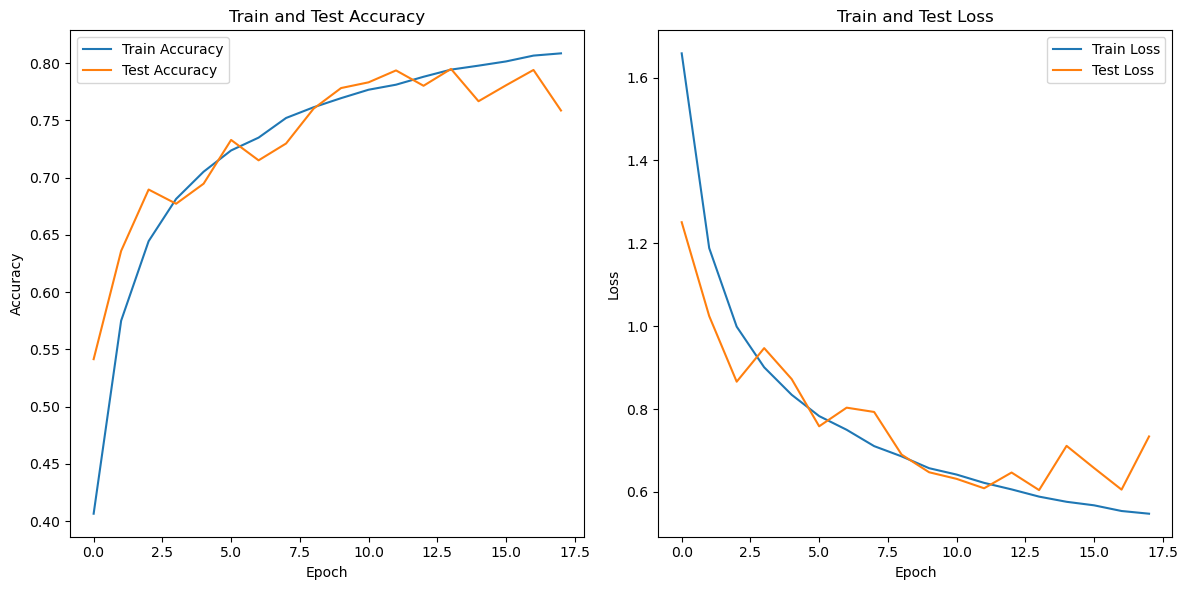

In [84]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train and Test Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Train and Test Loss')

plt.tight_layout()
plt.show()


## Plot images from the test set with their actual and predicted labels

#### 17 out of 25 were predicted correctly

313/313 [==============================] - 4s 14ms/step


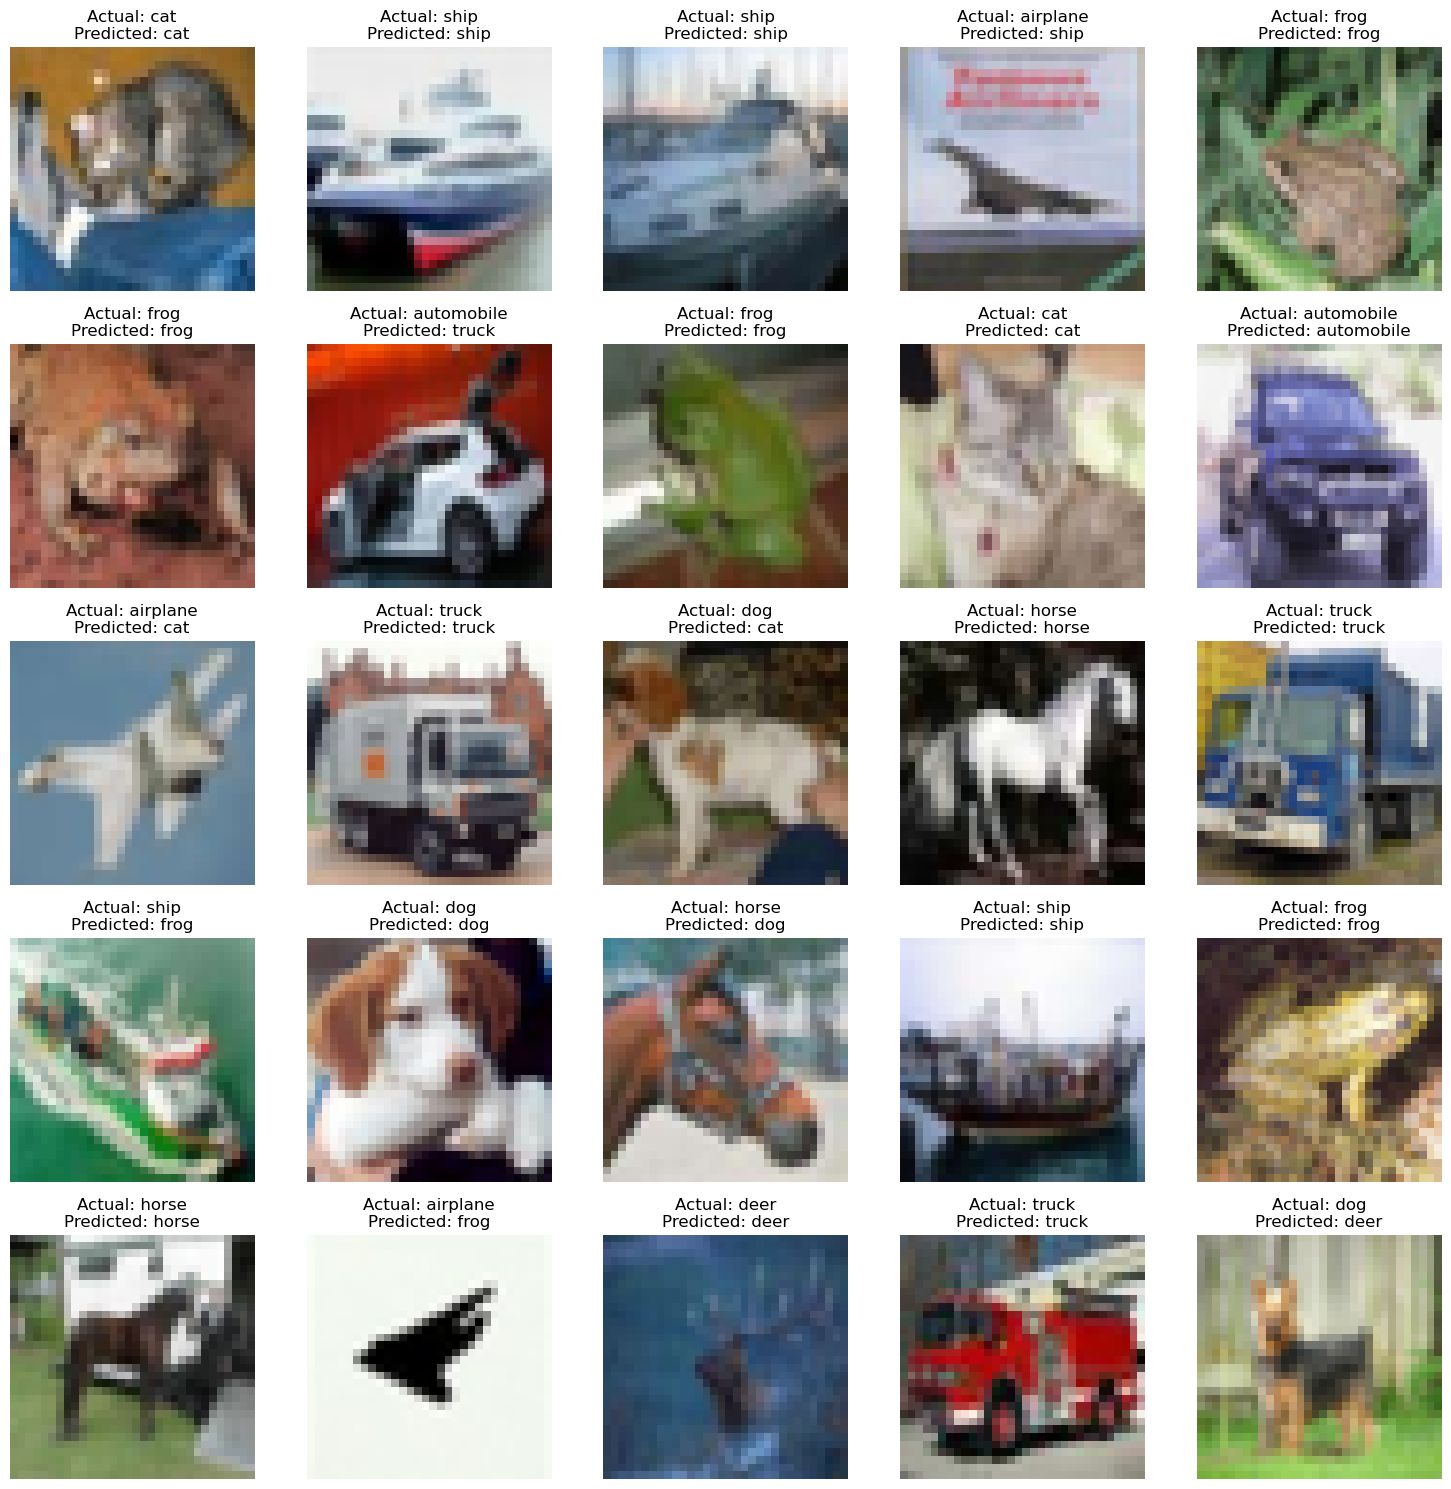

In [90]:
import numpy as np
import matplotlib.pyplot as plt

num_rows = 5
num_cols = 5

plt.figure(figsize=(15, 15))

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

for i in range(num_rows * num_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    actual_label = class_names[np.argmax(test_labels[i])]
    predicted_label = class_names[predicted_labels[i]]
    plt.title(f'Actual: {actual_label}\nPredicted: {predicted_label}')
    plt.axis('off')

plt.tight_layout()
plt.show()
